2024-08-01 21:12:03.865415: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 21:12:04.004291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 21:12:05.060880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_1030728/1197464468.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

Epoch 1/50


I0000 00:00:1722526937.198960 1030900 service.cc:145] XLA service 0x7f837401b360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722526937.199040 1030900 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-08-01 21:12:17.209889: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-01 21:12:17.271923: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


 154/2324 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - loss: 1.1894

I0000 00:00:1722526937.792637 1030900 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2324/2324 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.0491 - val_loss: 0.7259
Epoch 2/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7160 - val_loss: 0.6015
Epoch 3/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7592 - val_loss: 0.5815
Epoch 4/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5670 - val_loss: 0.5743
Epoch 5/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6491 - val_loss: 0.5710
Epoch 6/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5972 - val_loss: 0.5688
Epoch 7/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5544 - val_loss: 0.5669
Epoch 8/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6216 - val_loss: 0.5657
Epoch 9/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6064 - val_loss: 0.5652
Epoch 10/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5090 - val_loss: 0.5649
Epoch 11/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5759 - val_loss: 0.5648
Epoch 12/50
2324/2324 ━━━━━━━━━━━━━━━━━━━

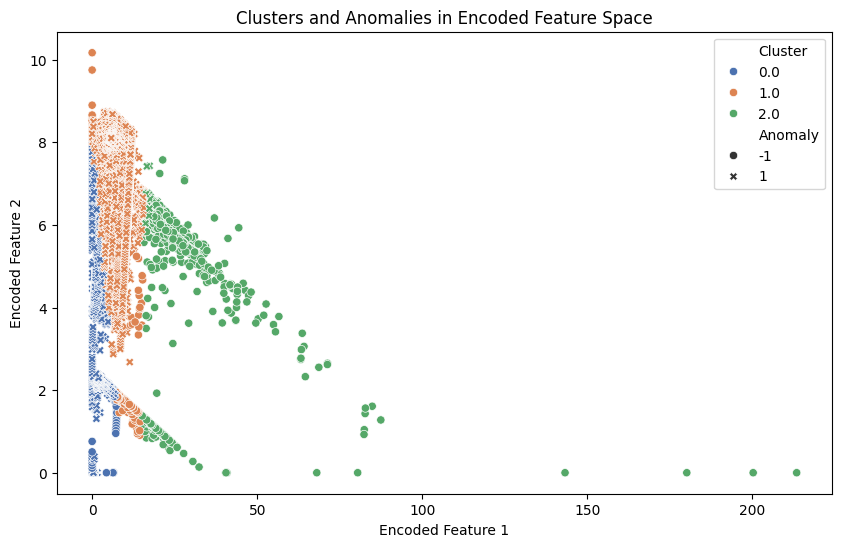

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  Encoded Feature 1  \
0 2017-06-29             0.0    1000000.0    1000000.0  .           0.811066   
1 2017-07-05             0.0    1000000.0    2000000.0  .           0.808242   
2 2017-07-18             0.0     500000.0    2500000.0  .           0.611359   
3 2017-08-01             0.0    3000000.0    5500000.0  .           1.580247   
4 2017-08-16             0.0     500000.0    6000000.0  .           0.601475   

   Encoded Feature 2  Anomaly  Cluster  
0                0.0       -1    

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from keras.models import Model, Sequential
from keras.layers import Input, Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'bank.xlsx'
data = pd.read_excel(file_path)

# Fill missing values for withdrawal and deposit amounts with 0
data['WITHDRAWAL AMT'].fillna(0, inplace=True)
data['DEPOSIT AMT'].fillna(0, inplace=True)

# Define features for the autoencoder
features = ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets, retaining indices
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Autoencoder model for feature extraction
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of features in the reduced dimensional space

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Extract features using the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train_encoded)
y_pred_train = iso_forest.predict(X_train_encoded)
y_pred_test = iso_forest.predict(X_test_encoded)

# Map -1 to anomalies and 1 to normal points
anomalies_train = np.where(y_pred_train == -1)
anomalies_test = np.where(y_pred_test == -1)

# Pattern recognition using K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_encoded)
clusters_train = kmeans.predict(X_train_encoded)
clusters_test = kmeans.predict(X_test_encoded)

# Add results to the original data
data['Encoded Feature 1'] = np.nan
data['Encoded Feature 2'] = np.nan
data.loc[X_train.index, 'Encoded Feature 1'] = X_train_encoded[:, 0]
data.loc[X_train.index, 'Encoded Feature 2'] = X_train_encoded[:, 1]
data.loc[X_test.index, 'Encoded Feature 1'] = X_test_encoded[:, 0]
data.loc[X_test.index, 'Encoded Feature 2'] = X_test_encoded[:, 1]

data['Anomaly'] = 1
data.loc[data.index.isin(X_train.index[anomalies_train]), 'Anomaly'] = -1
data.loc[data.index.isin(X_test.index[anomalies_test]), 'Anomaly'] = -1

data['Cluster'] = np.nan
data.loc[X_train.index, 'Cluster'] = clusters_train
data.loc[X_test.index, 'Cluster'] = clusters_test

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Encoded Feature 1', y='Encoded Feature 2', hue='Cluster', style='Anomaly', palette='deep')
plt.title('Clusters and Anomalies in Encoded Feature Space')
plt.show()

# Print a sample of the results
print(data.head())

# Save the results to a new Excel file
data.to_excel('bank_with_anomalies_and_clusters.xlsx', index=False)


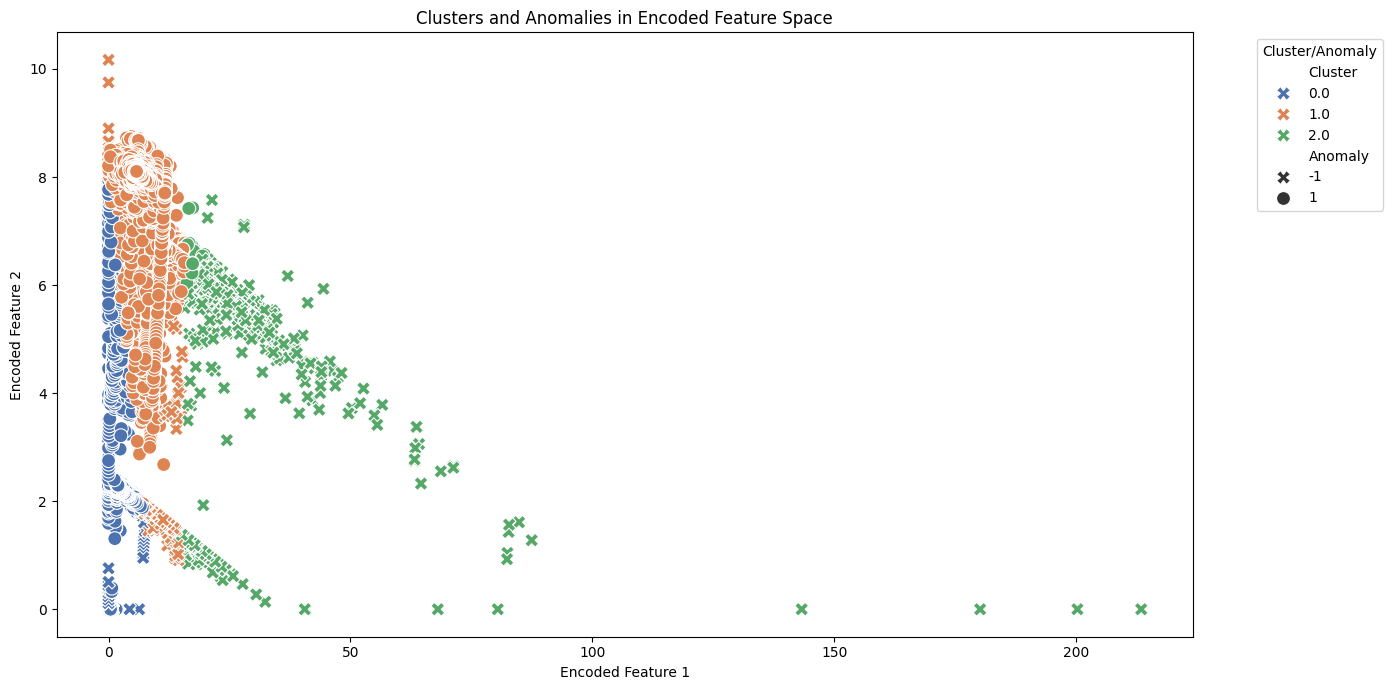

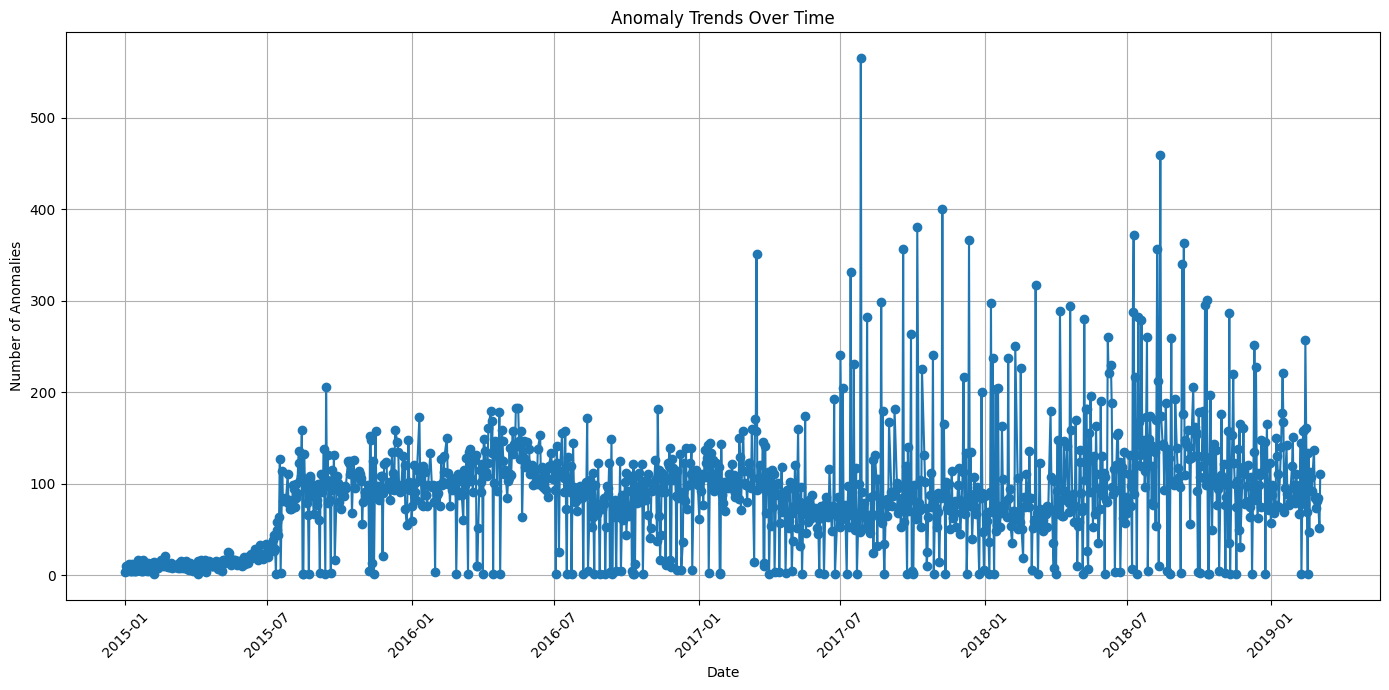

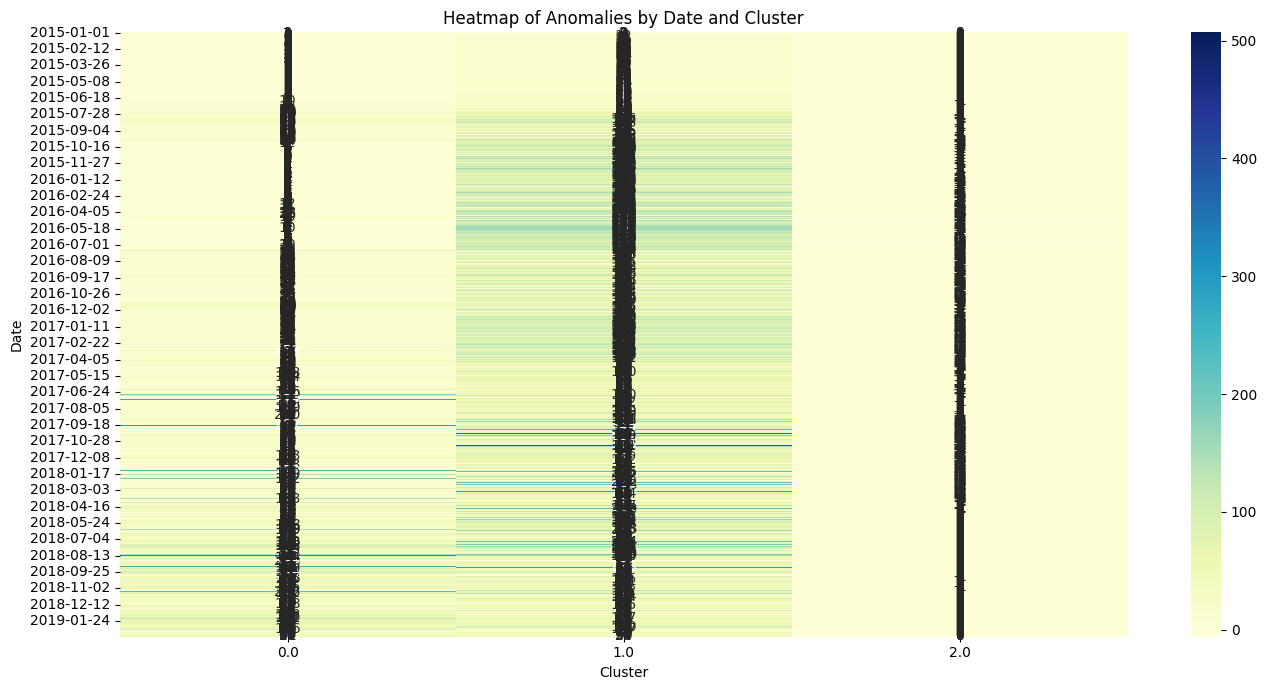

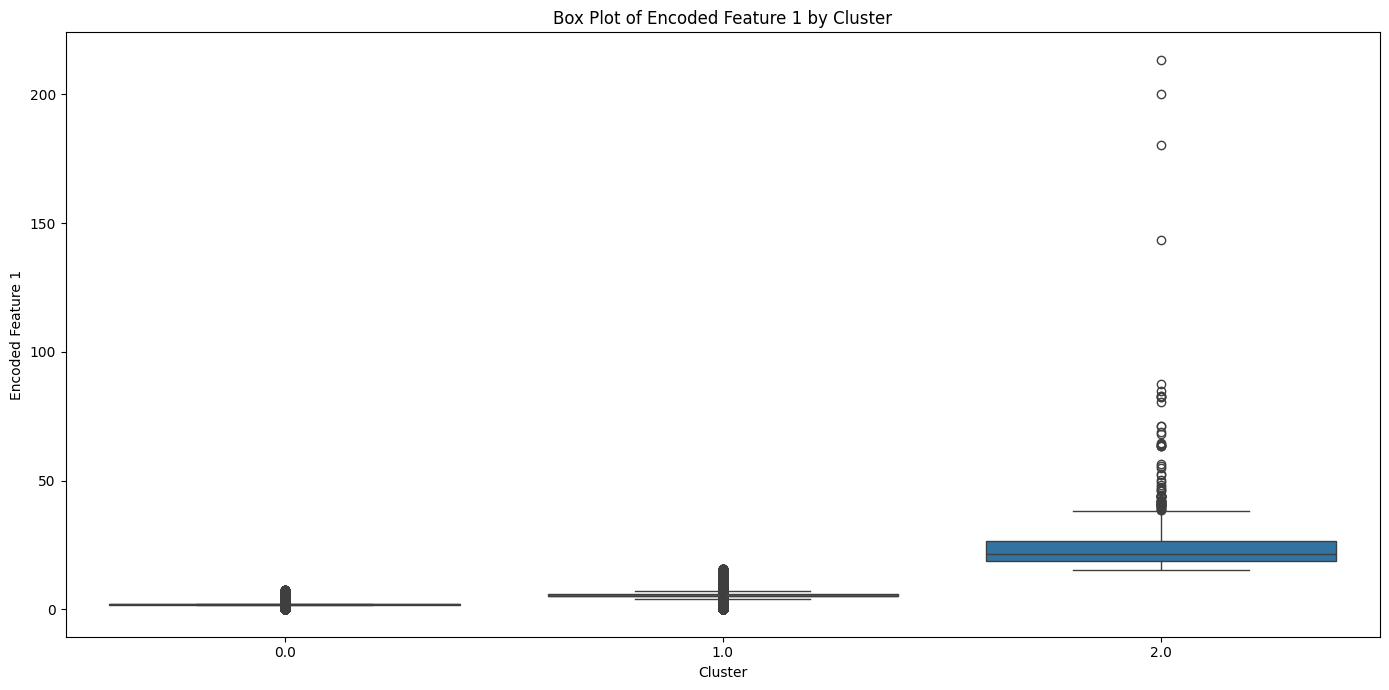

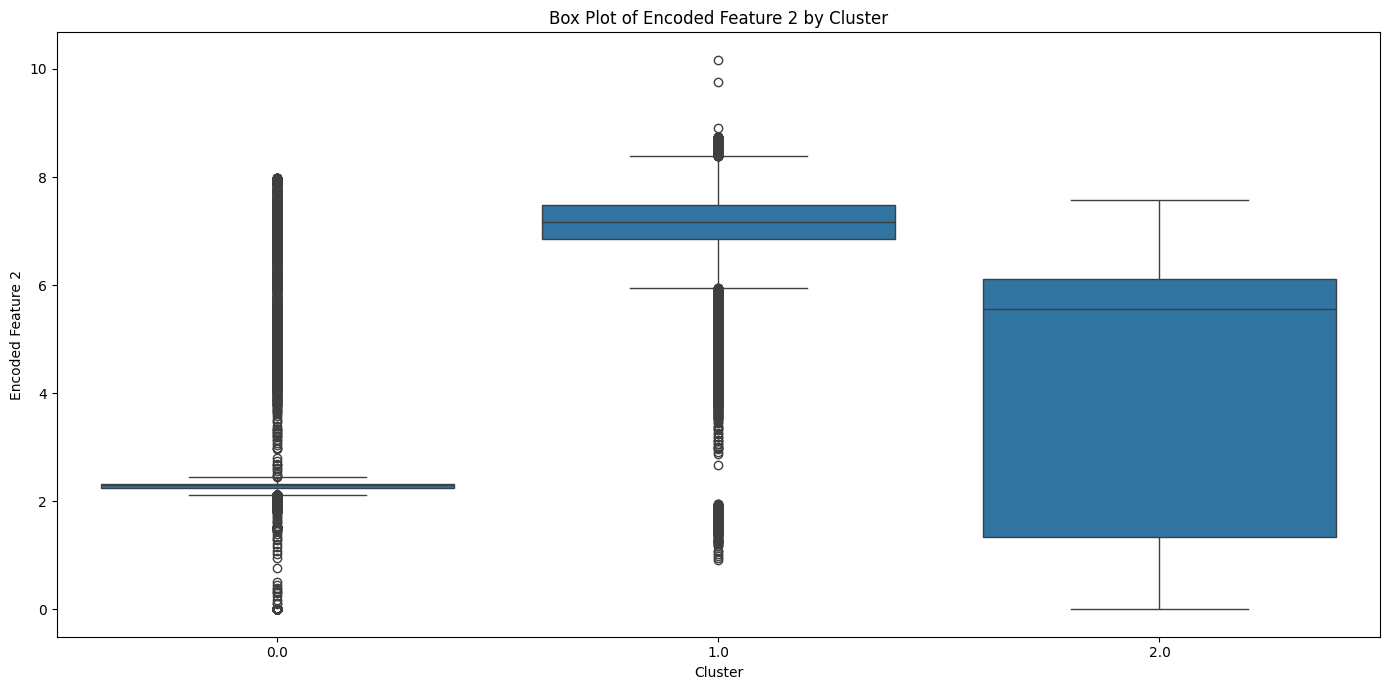

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Create a scatter plot with clusters and anomalies
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Encoded Feature 1', y='Encoded Feature 2', hue='Cluster', style='Anomaly', palette='deep', s=100, markers={1: 'o', -1: 'X'})
plt.title('Clusters and Anomalies in Encoded Feature Space')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.legend(title='Cluster/Anomaly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a time series plot of anomalies
anomalies_per_day = data.groupby(data['DATE'].dt.date)['Anomaly'].sum()
plt.figure(figsize=(14, 7))
plt.plot(anomalies_per_day.index, anomalies_per_day.values, marker='o', linestyle='-')
plt.title('Anomaly Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of anomalies by date and cluster
data['Date'] = data['DATE'].dt.date
heatmap_data = data.pivot_table(index='Date', columns='Cluster', values='Anomaly', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Anomalies by Date and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# Create box plots of encoded features by cluster
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Cluster', y='Encoded Feature 1')
plt.title('Box Plot of Encoded Feature 1 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Encoded Feature 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Cluster', y='Encoded Feature 2')
plt.title('Box Plot of Encoded Feature 2 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Encoded Feature 2')
plt.tight_layout()
plt.show()


Epoch 1/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0780 - val_loss: 0.7029
Epoch 2/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6730 - val_loss: 0.6067
Epoch 3/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6528 - val_loss: 0.5840
Epoch 4/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6282 - val_loss: 0.5748
Epoch 5/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5463 - val_loss: 0.5708
Epoch 6/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6692 - val_loss: 0.5686
Epoch 7/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5887 - val_loss: 0.5671
Epoch 8/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5045 - val_loss: 0.5661
Epoch 9/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6322 - val_loss: 0.5655
Epoch 10/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6292 - val_loss: 0.5652
Epoch 11/50
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6307 - val_loss: 0.5649
Epoch 12/50
2324/2324 ━━━━━━━━

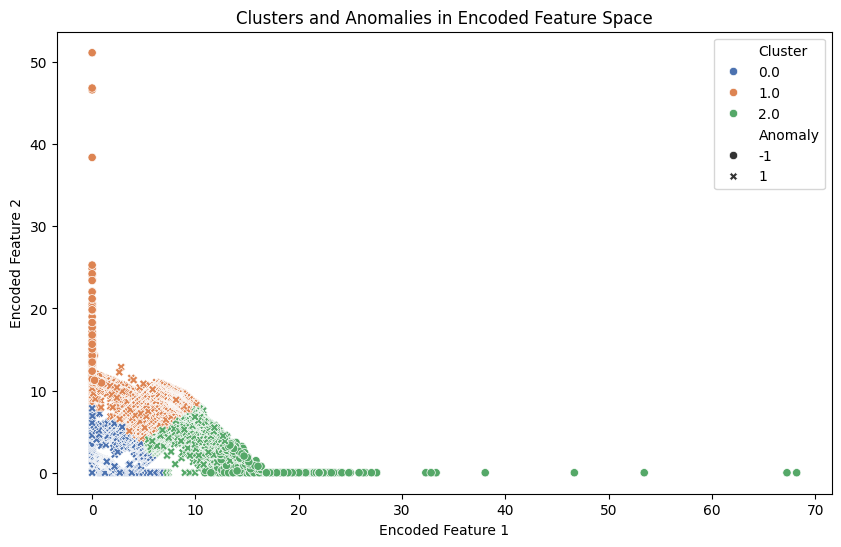

      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  Encoded Feature 1  \
0 2017-06-29             0.0    1000000.0    1000000.0  .                0.0   
1 2017-07-05             0.0    1000000.0    2000000.0  .                0.0   
2 2017-07-18             0.0     500000.0    2500000.0  .                0.0   
3 2017-08-01             0.0    3000000.0    5500000.0  .                0.0   
4 2017-08-16             0.0     500000.0    6000000.0  .                0.0   

   Encoded Feature 2  Anomaly  Cluster  
0                0.0        1    

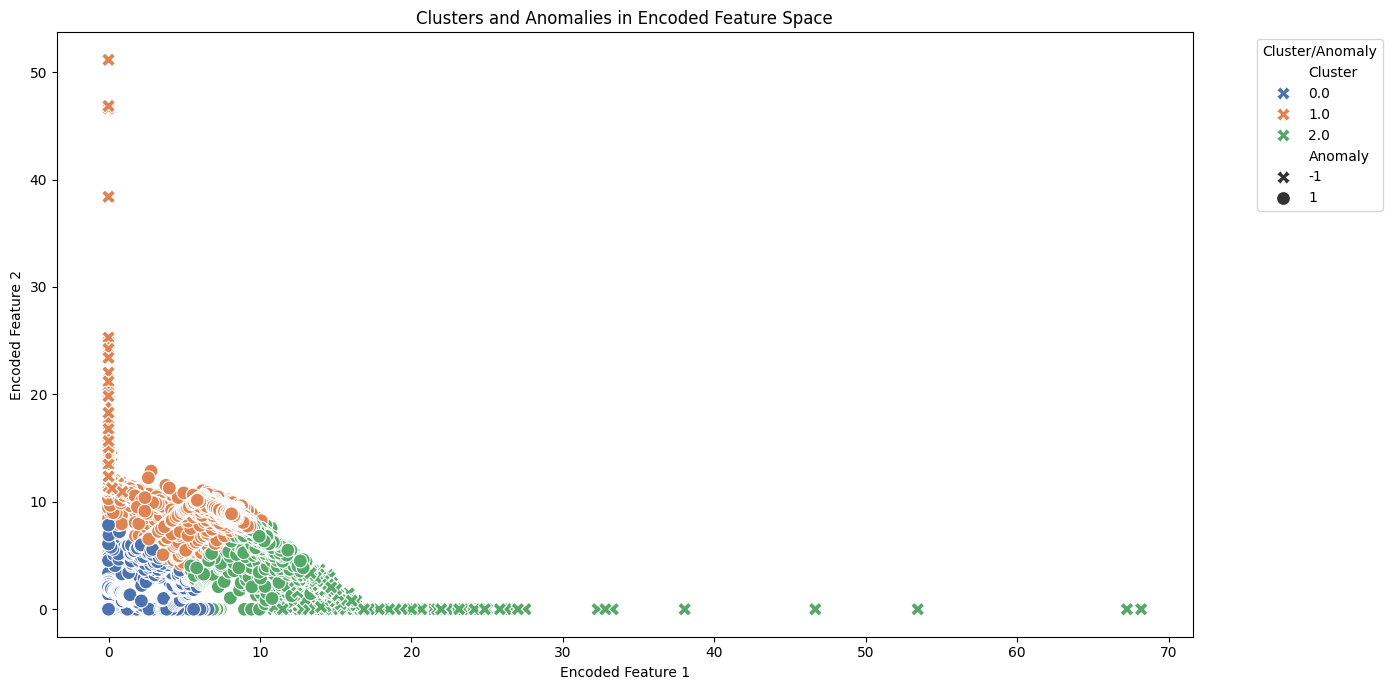

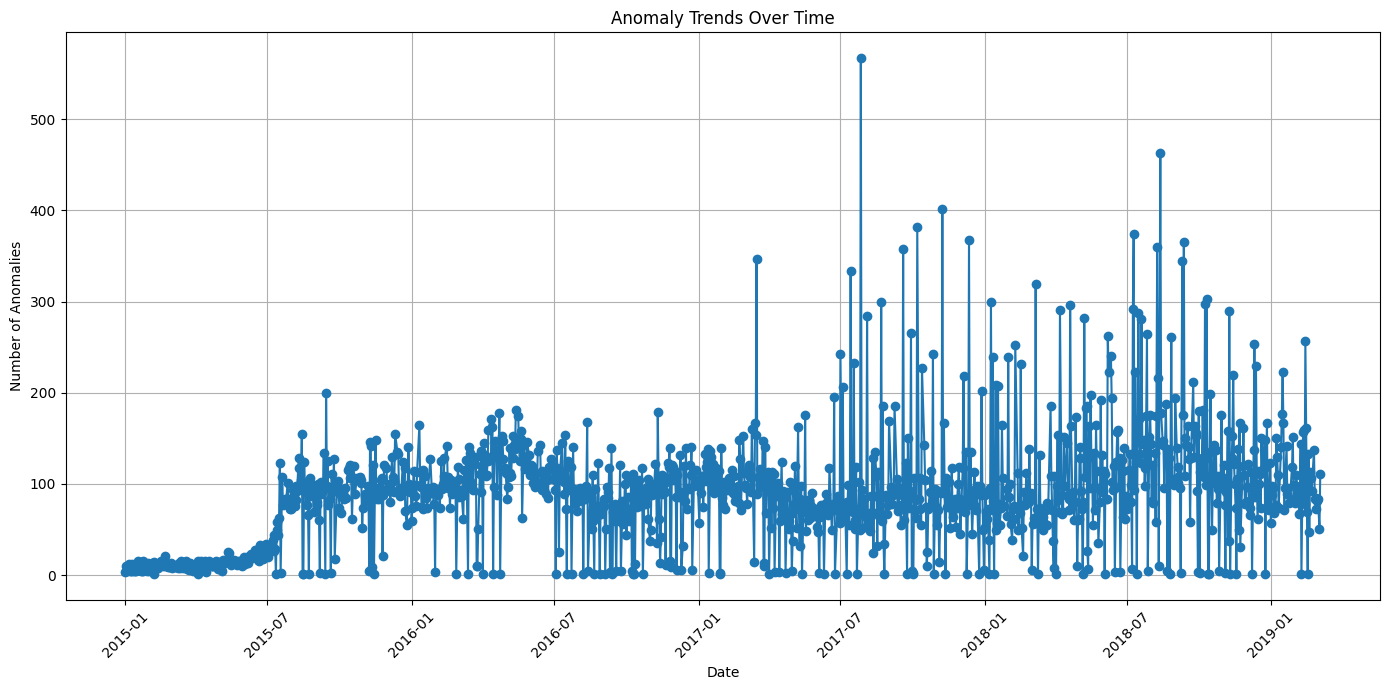

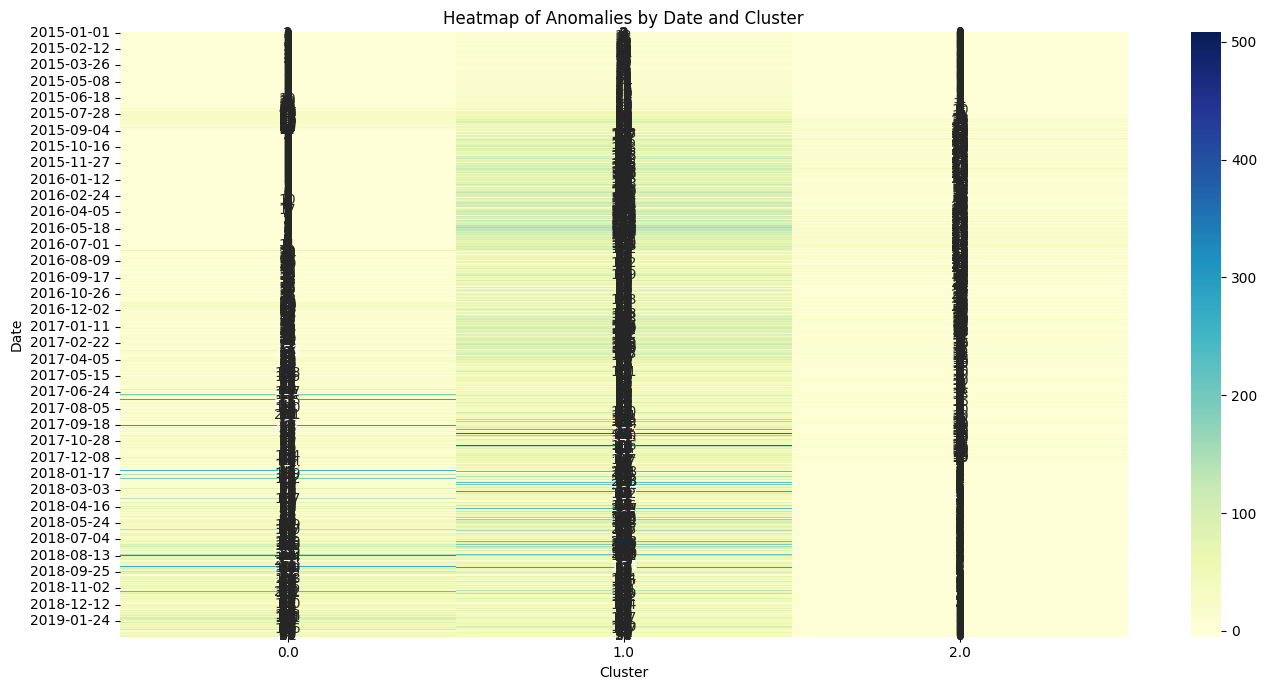

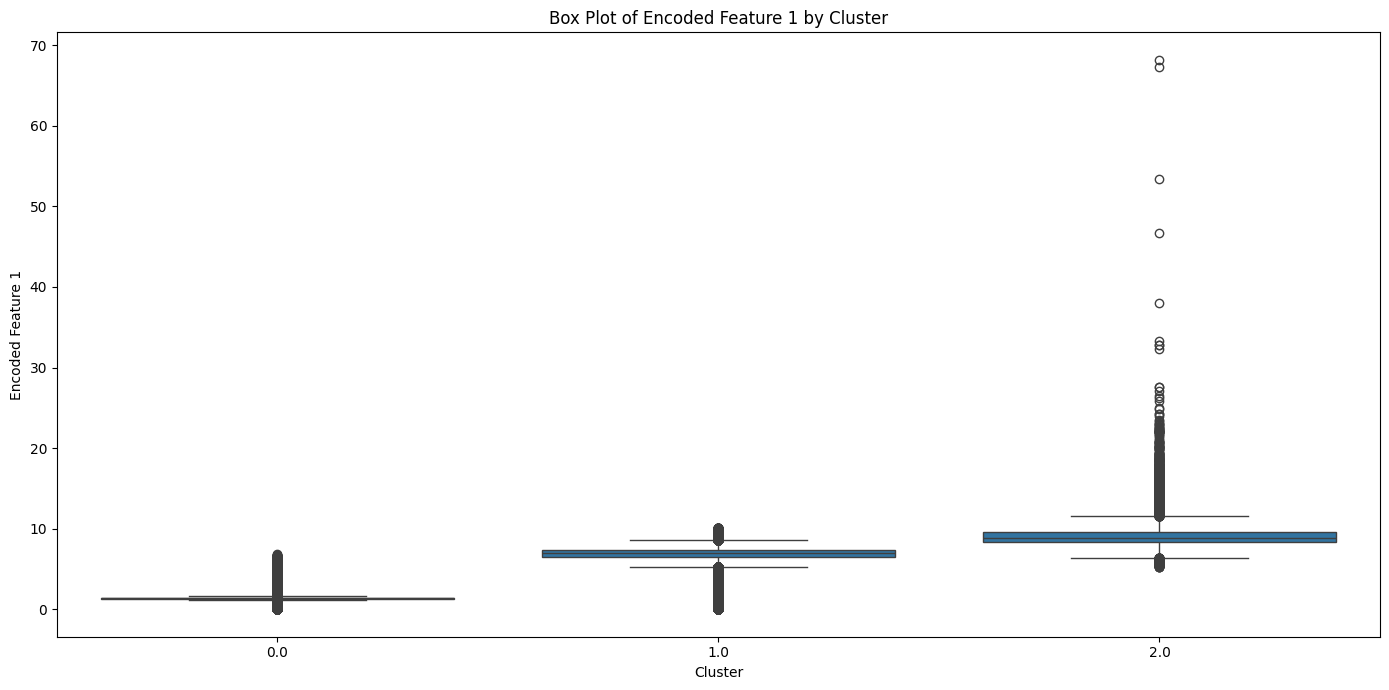

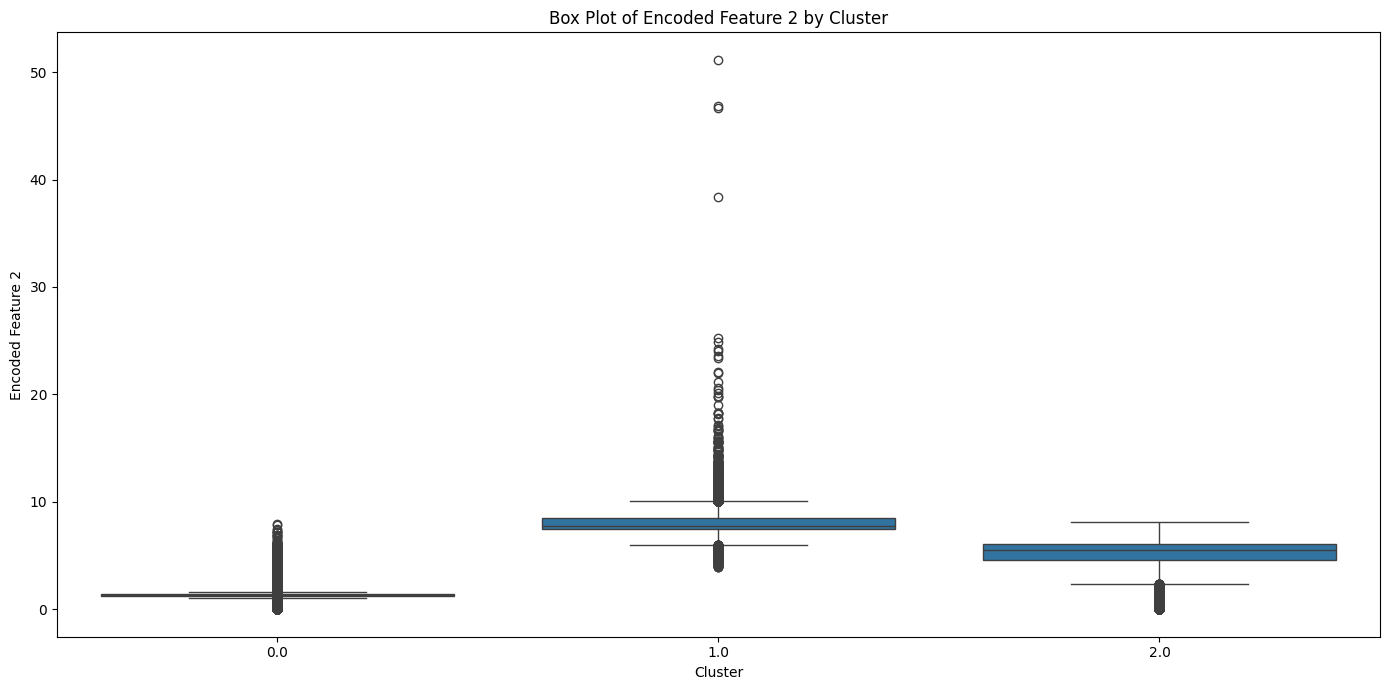

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from keras.models import Model
from keras.layers import Input, Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'bank.xlsx'
data = pd.read_excel(file_path)

# Fill missing values for withdrawal and deposit amounts with 0
data.loc[:, 'WITHDRAWAL AMT'] = data['WITHDRAWAL AMT'].fillna(0)
data.loc[:, 'DEPOSIT AMT'] = data['DEPOSIT AMT'].fillna(0)

# Define features for the autoencoder
features = ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets, retaining indices
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Autoencoder model for feature extraction
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of features in the reduced dimensional space

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Extract features using the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train_encoded)
y_pred_train = iso_forest.predict(X_train_encoded)
y_pred_test = iso_forest.predict(X_test_encoded)

# Map -1 to anomalies and 1 to normal points
anomalies_train = np.where(y_pred_train == -1)
anomalies_test = np.where(y_pred_test == -1)

# Pattern recognition using K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_encoded)
clusters_train = kmeans.predict(X_train_encoded)
clusters_test = kmeans.predict(X_test_encoded)

# Add results to the original data
data['Encoded Feature 1'] = np.nan
data['Encoded Feature 2'] = np.nan
data.loc[X_train.index, 'Encoded Feature 1'] = X_train_encoded[:, 0]
data.loc[X_train.index, 'Encoded Feature 2'] = X_train_encoded[:, 1]
data.loc[X_test.index, 'Encoded Feature 1'] = X_test_encoded[:, 0]
data.loc[X_test.index, 'Encoded Feature 2'] = X_test_encoded[:, 1]

data['Anomaly'] = 1
data.loc[data.index.isin(X_train.index[anomalies_train]), 'Anomaly'] = -1
data.loc[data.index.isin(X_test.index[anomalies_test]), 'Anomaly'] = -1

data['Cluster'] = np.nan
data.loc[X_train.index, 'Cluster'] = clusters_train
data.loc[X_test.index, 'Cluster'] = clusters_test

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Encoded Feature 1', y='Encoded Feature 2', hue='Cluster', style='Anomaly', palette='deep')
plt.title('Clusters and Anomalies in Encoded Feature Space')
plt.show()

# Print a sample of the results
print(data.head())

# Save the results to a new Excel file
data.to_excel('bank_with_anomalies_and_clusters.xlsx', index=False)

# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Create a scatter plot with clusters and anomalies
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Encoded Feature 1', y='Encoded Feature 2', hue='Cluster', style='Anomaly', palette='deep', s=100, markers={1: 'o', -1: 'X'})
plt.title('Clusters and Anomalies in Encoded Feature Space')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.legend(title='Cluster/Anomaly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a time series plot of anomalies
anomalies_per_day = data.groupby(data['DATE'].dt.date)['Anomaly'].sum()
plt.figure(figsize=(14, 7))
plt.plot(anomalies_per_day.index, anomalies_per_day.values, marker='o', linestyle='-')
plt.title('Anomaly Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of anomalies by date and cluster
data['Date'] = data['DATE'].dt.date
heatmap_data = data.pivot_table(index='Date', columns='Cluster', values='Anomaly', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Anomalies by Date and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# Create box plots of encoded features by cluster
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Cluster', y='Encoded Feature 1')
plt.title('Box Plot of Encoded Feature 1 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Encoded Feature 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Cluster', y='Encoded Feature 2')
plt.title('Box Plot of Encoded Feature 2 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Encoded Feature 2')
plt.tight_layout()
plt.show()
